In [7]:
from Louvain_algo import Louvain_algo
import networkx as nx
import utils
import pickle

In [3]:
nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [4]:
def email():
    graph = nx.read_edgelist("data/email-Eu-core.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
email_graph = email()

In [8]:
algo = Louvain_algo(email_graph,1)
communities = algo.run()

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (2, 3), (3, 6), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 7), (5, 8), (6, 9), (7, 8), (8, 9)]


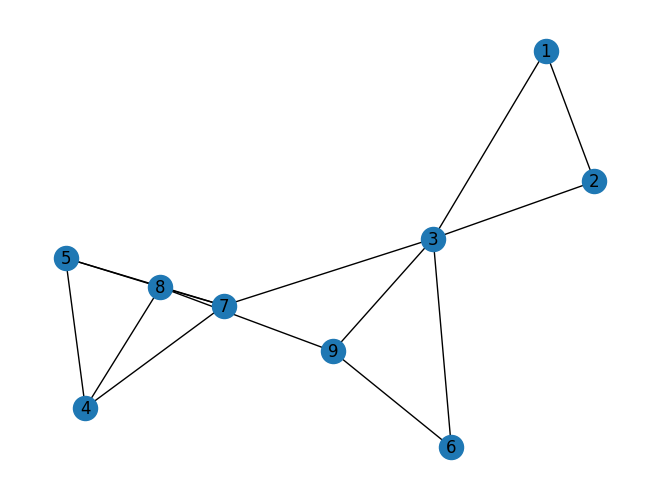

In [9]:
# Create a small graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

# Add edges
G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])

# Draw the graph
nx.draw(G, with_labels=True)
print(G.nodes)
print(G.edges)


In [10]:
%%time
algo = Louvain_algo(G,1)
communities = algo.run()

CPU times: user 47 µs, sys: 13 µs, total: 60 µs
Wall time: 64.8 µs


In [4]:
communities

{1: {4, 5, 7, 8}, 2: {1, 2, 3, 6, 9}}

In [5]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))
list(communities.values())

{1: {8, 4, 5, 7}, 2: {1, 2, 3, 6, 9}}
There are 2 communities
0.35714285714285715


[{4, 5, 7, 8}, {1, 2, 3, 6, 9}]

In [6]:
%%time
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
print(communities_built)

There are 2 communities.
0.35714285714285715
[{8, 4, 5, 7}, {1, 2, 3, 6, 9}]
CPU times: user 2.38 ms, sys: 0 ns, total: 2.38 ms
Wall time: 2.36 ms


In [7]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)
print("Is connected",nx.is_connected(graph))


The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496
Is connected False


In [8]:
s = list(nx.connected_components(graph))
G = graph.subgraph(s[0])
N = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  4158
The number of edges in the graph is: 13428


In [9]:
algo = Louvain_algo(G,1)

In [10]:
%%time
communities = algo.run()

passage 1
{3466: {3466}, 937: {937}, 5233: {5233}, 8579: {8579}, 10310: {10310}, 15931: {15931}, 17038: {17038}, 18720: {18720}, 19607: {19607}, 1854: {1854}, 4583: {4583}, 9572: {9572}, 10841: {10841}, 13056: {13056}, 14982: {14982}, 16310: {16310}, 19640: {19640}, 23855: {23855}, 24372: {24372}, 24814: {24814}, 5052: {5052}, 899: {899}, 1796: {1796}, 2287: {2287}, 3096: {3096}, 3386: {3386}, 4472: {4472}, 5346: {5346}, 5740: {5740}, 6094: {6094}, 6376: {6376}, 9124: {9124}, 10235: {10235}, 10427: {10427}, 10597: {10597}, 15159: {15159}, 16148: {16148}, 16741: {16741}, 18235: {18235}, 18549: {18549}, 19297: {19297}, 20511: {20511}, 20595: {20595}, 20613: {20613}, 24371: {24371}, 24559: {24559}, 24731: {24731}, 25102: {25102}, 25271: {25271}, 25396: {25396}, 1658: {1658}, 4822: {4822}, 6864: {6864}, 7689: {7689}, 7926: {7926}, 10268: {10268}, 12971: {12971}, 18600: {18600}, 20421: {20421}, 20886: {20886}, 21048: {21048}, 22393: {22393}, 23186: {23186}, 23214: {23214}, 23298: {23298}, 2

In [11]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))



{2: {13056, 14982, 10310, 5233, 24372, 14550, 1787, 1279}, 14: {17156, 16261, 392, 17804, 3853, 8718, 16270, 15251, 20375, 17956, 3878, 23721, 7601, 2485, 14265, 18622, 22463, 19525, 16584, 11468, 11470, 10062, 20432, 3927, 3937, 5218, 3173, 16102, 21866, 5230, 18543, 12406}, 19: {16258, 6667, 25628, 4125, 10912, 16676, 21927, 6825, 14123, 22836, 10805, 2239, 19783, 21194, 1356, 6626, 25069, 22894, 10351, 11638}, 24: {4376, 5794, 26051, 260, 15301, 20934, 18246, 13026, 11401, 10601, 26023, 9712, 7025, 26100, 13205, 2710, 11640, 25209}, 26: {18235, 5634, 25442, 1796, 6376, 5740, 941, 23151, 13712, 22321, 18549, 23383, 4472, 3386, 24731, 5052, 16727}, 29: {2049, 12291, 17414, 14344, 13320, 15372, 8208, 8721, 12306, 5143, 23577, 18971, 9755, 22556, 17439, 20511, 7717, 6700, 20528, 13364, 20534, 18487, 2614, 12860, 22083, 14419, 2133, 20569, 3164, 12380, 2654, 23649, 9314, 24163, 2661, 4712, 23145, 624, 25201, 25205, 9335, 8824, 14969, 12928, 5251, 4743, 11402, 4748, 3730, 3731, 25235, 160

In [12]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))

There are 41 communities.
0.8486098593862044


In [13]:
nodes,edges = utils.Load_data("data/musae_facebook_target.csv","data/musae_facebook_edges.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [14]:
algo = Louvain_algo(G,1)

In [15]:
communities = algo.run(2)

passage 1
{0: {0}, 1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}, 6: {6}, 7: {7}, 8: {8}, 9: {9}, 10: {10}, 11: {11}, 12: {12}, 13: {13}, 14: {14}, 15: {15}, 16: {16}, 17: {17}, 18: {18}, 19: {19}, 20: {20}, 21: {21}, 22: {22}, 23: {23}, 24: {24}, 25: {25}, 26: {26}, 27: {27}, 28: {28}, 29: {29}, 30: {30}, 31: {31}, 32: {32}, 33: {33}, 34: {34}, 35: {35}, 36: {36}, 37: {37}, 38: {38}, 39: {39}, 40: {40}, 41: {41}, 42: {42}, 43: {43}, 44: {44}, 45: {45}, 46: {46}, 47: {47}, 48: {48}, 49: {49}, 50: {50}, 51: {51}, 52: {52}, 53: {53}, 54: {54}, 55: {55}, 56: {56}, 57: {57}, 58: {58}, 59: {59}, 60: {60}, 61: {61}, 62: {62}, 63: {63}, 64: {64}, 65: {65}, 66: {66}, 67: {67}, 68: {68}, 69: {69}, 70: {70}, 71: {71}, 72: {72}, 73: {73}, 74: {74}, 75: {75}, 76: {76}, 77: {77}, 78: {78}, 79: {79}, 80: {80}, 81: {81}, 82: {82}, 83: {83}, 84: {84}, 85: {85}, 86: {86}, 87: {87}, 88: {88}, 89: {89}, 90: {90}, 91: {91}, 92: {92}, 93: {93}, 94: {94}, 95: {95}, 96: {96}, 97: {97}, 98: {98}, 99: {99}, 100: {100

In [39]:
len(communities)

190

In [40]:
nx.community.modularity(G,list(communities.values()))
print(nx.community.modularity(G,list(communities.values())))
print("There are",len(communities),"communities.")

0.8076806350574501
There are 190 communities.


In [36]:
import pickle
#In case of storeing the comunities 
with open('data/com0_', 'wb') as file:
    pickle.dump(communities, file)


In [19]:
G.number_of_nodes()

22470

In [43]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
nx.community.modularity(G,communities_built)

There are 60 communities.


0.8142537953437627

0.8145420188092388

In [24]:
communities_built

[{44,
  79,
  101,
  263,
  282,
  410,
  568,
  584,
  717,
  787,
  828,
  839,
  991,
  1126,
  1305,
  1394,
  1517,
  1523,
  1558,
  1618,
  1753,
  2052,
  2160,
  2432,
  2532,
  2864,
  2872,
  2971,
  3074,
  3103,
  3241,
  3372,
  3639,
  3852,
  3885,
  3981,
  4031,
  4077,
  4118,
  4278,
  4348,
  4401,
  4527,
  4751,
  4917,
  5010,
  5082,
  5165,
  5229,
  5317,
  5525,
  5589,
  5858,
  6147,
  6398,
  6635,
  6706,
  6745,
  6783,
  6836,
  7154,
  7228,
  7288,
  7355,
  7552,
  7554,
  7606,
  7800,
  7919,
  7978,
  8062,
  8641,
  8795,
  9034,
  9194,
  9288,
  9567,
  9641,
  9813,
  9996,
  9999,
  10625,
  10974,
  11137,
  11173,
  11248,
  11264,
  11286,
  11329,
  11349,
  11375,
  11473,
  11850,
  12025,
  12514,
  12745,
  12774,
  12870,
  13074,
  13140,
  13328,
  13383,
  13408,
  13675,
  13922,
  14016,
  14053,
  14127,
  14236,
  14703,
  14831,
  14935,
  14984,
  15332,
  15389,
  15416,
  15490,
  15880,
  15908,
  15930,
  16103,
  16105

In [13]:
G.subgraph([3466]).subgraph([937,5233,1031]).number_of_edges()

0

In [11]:
G.nodes()
G[3466]

AtlasView(FilterAtlas({937: {}, 5233: {}, 8579: {}, 10310: {}, 15931: {}, 17038: {}, 18720: {}, 19607: {}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7e6435f10b80>))

In [10]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    if com_inv[n] not in gains.values():
        gains[1]=com_inv[n]
print(gains)


{1: 1}
CPU times: user 104 µs, sys: 74 µs, total: 178 µs
Wall time: 189 µs


In [11]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    gains[1]=com_inv[n]
print(gains)

{1: 1}
CPU times: user 135 µs, sys: 96 µs, total: 231 µs
Wall time: 246 µs


In [5]:
print("j")

j
